# What is Backtesting?

In [2]:
import pandas as pd
import yfinance as yf

In [3]:
d=yf.Ticker("BTC-USD")
d1=d.history(start="2016-10-2", end="2023-1-2", actions=False)
d1.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,17005713920
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,14472237479
2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,15929162910
2022-12-31,16603.673828,16628.986328,16517.519531,16547.496094,11239186456
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,9244361700


In [4]:
d1.reset_index(inplace=True)
import matplotlib.pyplot as plt

In [5]:
d1.head()

,Date,Open,High,Low,Close,Volume
0,2016-10-01,609.929016,615.237000,609.929016,613.982971,56357000
1,2016-10-02,613.947998,614.005005,609.682007,610.892029,39249800
2,2016-10-03,610.968018,612.567993,610.455017,612.132996,46798300
3,2016-10-04,612.052002,612.054016,609.479004,610.203979,49801600
4,2016-10-05,610.218018,613.814026,609.617004,612.510986,68077504


In [6]:
import pandas_ta as ta

In [8]:
d1['SMAfast']=ta.sma(d1['Close'],14)
d1['SMAslow']=ta.sma(d1['Close'],42)
d1.head()

,Date,Open,High,Low,Close,Volume,SMAfast,SMAslow
0,2016-10-01,609.929016,615.237000,609.929016,613.982971,56357000,NaN,NaN
1,2016-10-02,613.947998,614.005005,609.682007,610.892029,39249800,NaN,NaN
2,2016-10-03,610.968018,612.567993,610.455017,612.132996,46798300,NaN,NaN
3,2016-10-04,612.052002,612.054016,609.479004,610.203979,49801600,NaN,NaN
4,2016-10-05,610.218018,613.814026,609.617004,612.510986,68077504,NaN,NaN


In [9]:
d2=d1[41:]

In [10]:
d2.head()

,Date,Open,High,Low,Close,Volume,SMAfast,SMAslow
41,2016-11-11,715.554993,718.317993,714.409973,716.411011,63119700,711.643502,661.804119
42,2016-11-12,716.752014,717.148010,704.034973,705.054016,64622500,710.970289,663.972478
43,2016-11-13,705.195984,705.257019,687.315002,702.031006,80318096,710.982217,666.142453
44,2016-11-14,701.997009,706.283997,699.807983,705.020996,62993000,711.271432,668.354072
45,2016-11-15,705.794006,715.718018,705.260010,711.619019,72038496,709.973288,670.768716


# Programming the Strategy

In [11]:
trades_entered=0
success_trades=0
failed_trades=0
total_profit=0
total_loss=0
a=list(range(41,2284))
profit=0
currently_holding=False
for j in a:
    if currently_holding==False:
        if(d2['SMAfast'][j]>d2['SMAslow'][j]):
            buying_date=d2['Date'][j]
            print('Bought BTC-USD at:', d2['SMAfast'][j], 'on date:', buying_date)
            currently_holding=True
            buying_price=d2['SMAfast'][j]
            trades_entered=trades_entered+1
        else:
            pass
    elif currently_holding==True:
        if(d2['SMAfast'][j]<d2['SMAslow'][j]):
            selling_date=d2['Date'][j]
            print('Sold BTC-USD at:', d2['SMAfast'][j], 'on date:', selling_date)
            currently_holding=False
            selling_price=d2['SMAfast'][j]
            closing_position=selling_price-buying_price
            if(closing_position>0):
                success_trades=success_trades+1
                total_profit=total_profit+closing_position
            else:
                failed_trades=failed_trades+1
                total_loss=total_loss+closing_position
            print('Closing Position is:', closing_position)
            profit=profit+closing_position
            print('Net profit is:', profit)
        else:
            pass
print('Total number of trades:', trades_entered)
print('Trades where strategy yielded profit:', success_trades)
print('Trades where strategy yielded loss:', failed_trades)
print('Total profit made:', total_profit)
print('Total loss incurred:', total_loss)

Bought BTC-USD at: 711.6435023716518 on date: 2016-11-11 00:00:00
Sold BTC-USD at: 872.7676391601562 on date: 2017-01-18 00:00:00
Closing Position is: 161.12413678850442
Net profit is: 161.12413678850442
Bought BTC-USD at: 922.4308602469308 on date: 2017-02-01 00:00:00
Sold BTC-USD at: 1128.3255702427455 on date: 2017-03-23 00:00:00
Closing Position is: 205.89470999581465
Net profit is: 367.01884678431907
Bought BTC-USD at: 1142.760018484933 on date: 2017-04-12 00:00:00
Sold BTC-USD at: 2547.1364222935267 on date: 2017-07-07 00:00:00
Closing Position is: 1404.3764038085938
Net profit is: 1771.3952505929128
Bought BTC-USD at: 2560.317844935826 on date: 2017-07-29 00:00:00
Sold BTC-USD at: 4111.623570033482 on date: 2017-09-16 00:00:00
Closing Position is: 1551.3057250976558
Net profit is: 3322.7009756905686
Bought BTC-USD at: 4204.603585379465 on date: 2017-10-07 00:00:00
Sold BTC-USD at: 15141.69287109375 on date: 2018-01-10 00:00:00
Closing Position is: 10937.089285714286
Net profit i

# Plotting SMAfast and SMAslow for crossover visuals

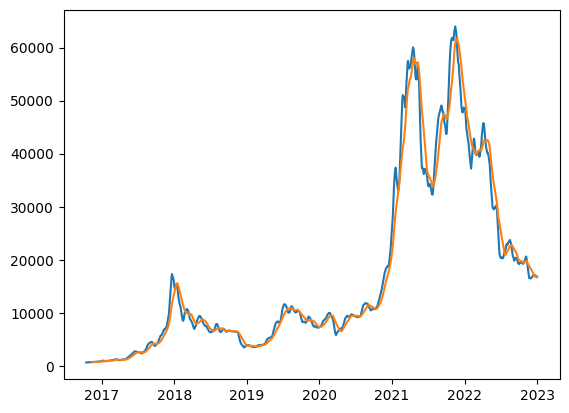

In [45]:
import matplotlib.pyplot as plt
plt.plot(d1['Date'],d1['SMAfast'])
plt.plot(d1['Date'],d1['SMAslow'])
plt.show()